## Handling multiple data for radial/azimuthal analysis.


version 1.0.0  January 7, 2020 JS

This script consists of 3 parts: 1) reading multiple.raw data, 2) conversion from cylindrical to spherical coodinates and save each image in tiff format, 3) conversion from spherical to 2D polar diagam and save it in 'pickle' format.

cropped image size is  2400  x  2600 pixcel


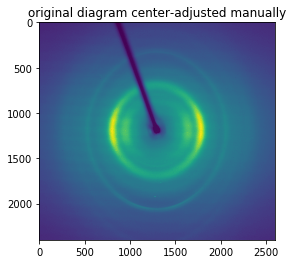

100%|██████████| 2016/2016 [00:51<00:00, 38.93it/s]


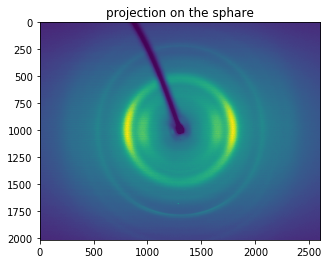

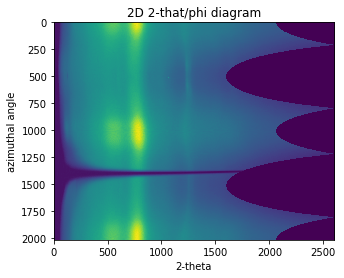

azimutal step is 0.178571  2-theta step is 0.028164
The maximum angle of 2-theta is  73.23
cropped image size is  2400  x  2600 pixcel


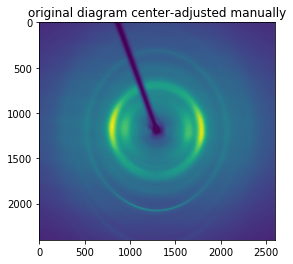

100%|██████████| 2016/2016 [00:52<00:00, 38.67it/s]


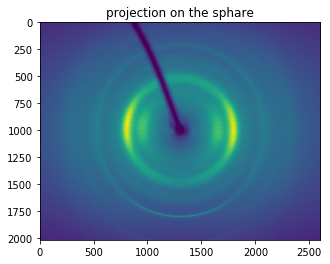

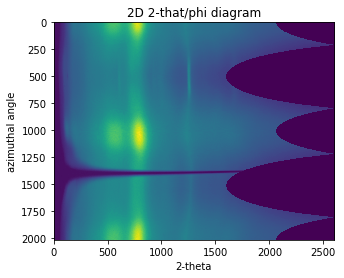

azimutal step is 0.178571  2-theta step is 0.028164
The maximum angle of 2-theta is  73.23
cropped image size is  2400  x  2600 pixcel


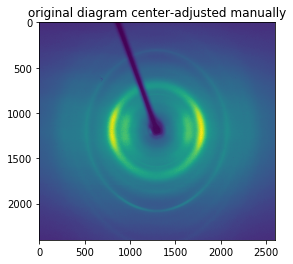

100%|██████████| 2016/2016 [00:52<00:00, 38.82it/s]


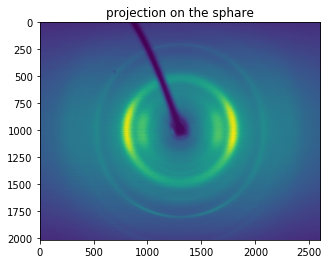

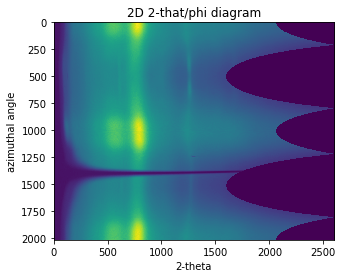

azimutal step is 0.178571  2-theta step is 0.028164
The maximum angle of 2-theta is  73.23
cropped image size is  2400  x  2600 pixcel


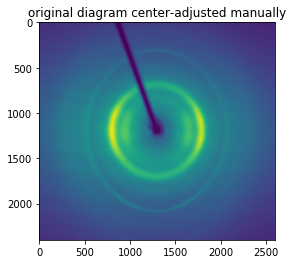

100%|██████████| 2016/2016 [00:52<00:00, 38.62it/s]


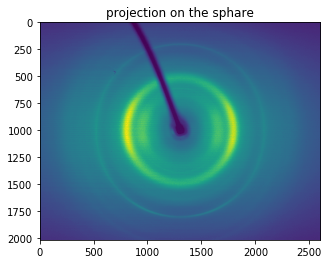

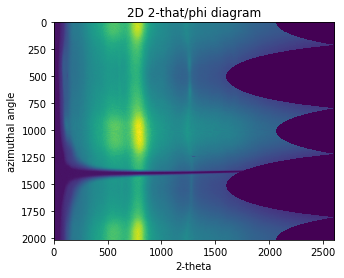

azimutal step is 0.178571  2-theta step is 0.028164
The maximum angle of 2-theta is  73.23
cropped image size is  2400  x  2600 pixcel


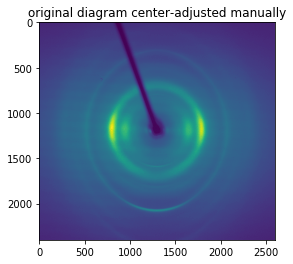

100%|██████████| 2016/2016 [00:52<00:00, 38.32it/s]


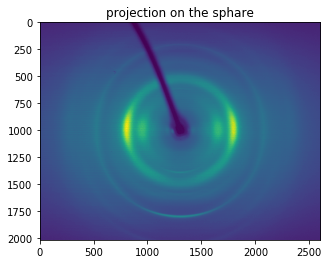

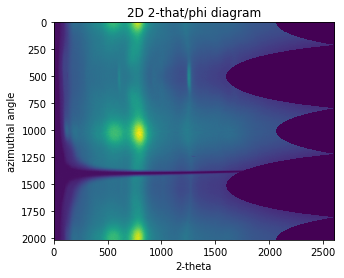

azimutal step is 0.178571  2-theta step is 0.028164
The maximum angle of 2-theta is  73.23
cropped image size is  2400  x  2600 pixcel


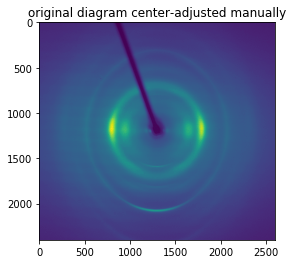

100%|██████████| 2016/2016 [00:51<00:00, 38.79it/s]


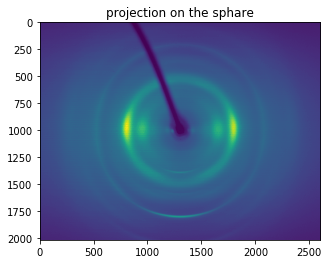

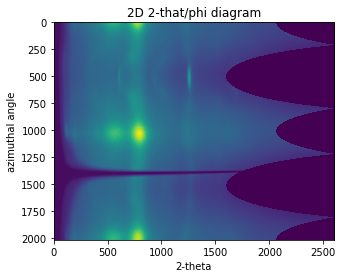

azimutal step is 0.178571  2-theta step is 0.028164
The maximum angle of 2-theta is  73.23
cropped image size is  2400  x  2600 pixcel


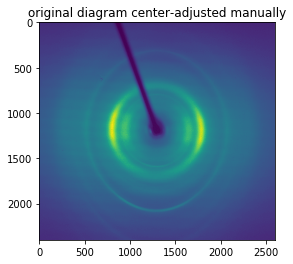

100%|██████████| 2016/2016 [00:51<00:00, 38.72it/s]


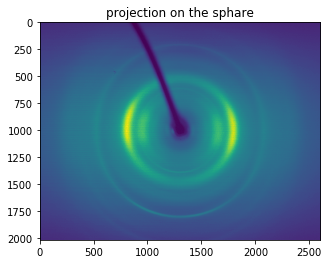

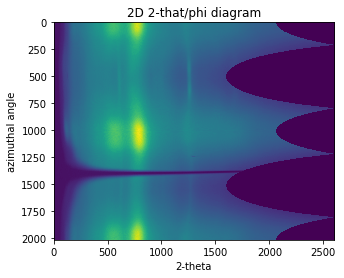

azimutal step is 0.178571  2-theta step is 0.028164
The maximum angle of 2-theta is  73.23
cropped image size is  2400  x  2600 pixcel


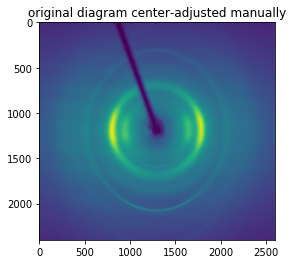

100%|██████████| 2016/2016 [00:51<00:00, 38.82it/s]


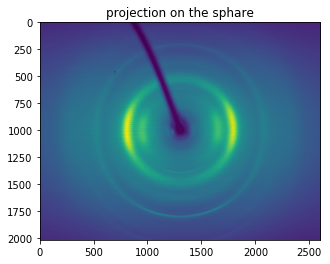

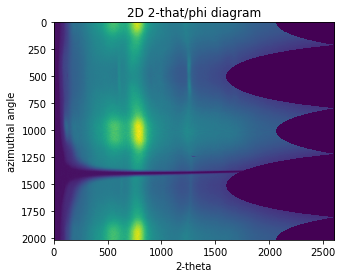

azimutal step is 0.178571  2-theta step is 0.028164
The maximum angle of 2-theta is  73.23
cropped image size is  2400  x  2600 pixcel


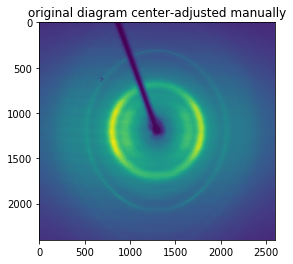

100%|██████████| 2016/2016 [00:52<00:00, 38.86it/s]


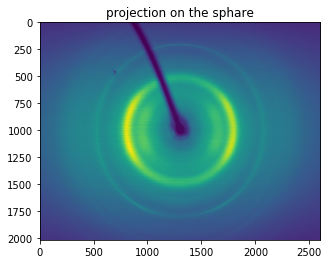

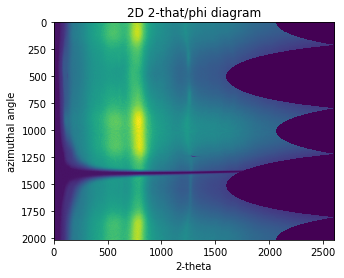

azimutal step is 0.178571  2-theta step is 0.028164
The maximum angle of 2-theta is  73.23
cropped image size is  2400  x  2600 pixcel


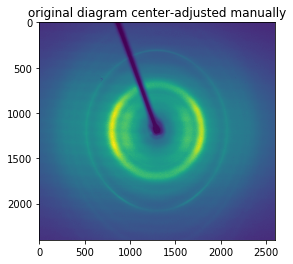

100%|██████████| 2016/2016 [00:52<00:00, 38.52it/s]


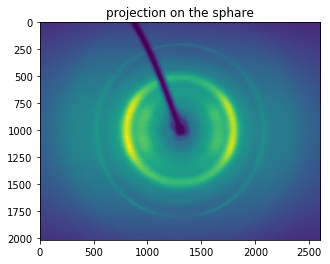

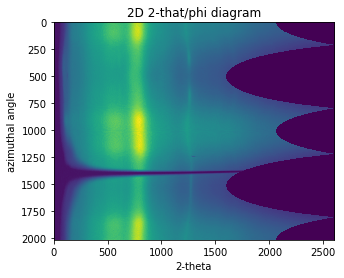

azimutal step is 0.178571  2-theta step is 0.028164
The maximum angle of 2-theta is  73.23
cropped image size is  2400  x  2600 pixcel


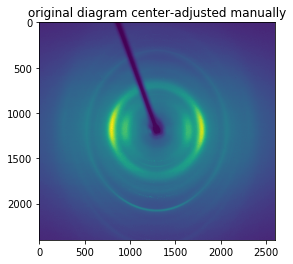

100%|██████████| 2016/2016 [00:52<00:00, 38.67it/s]


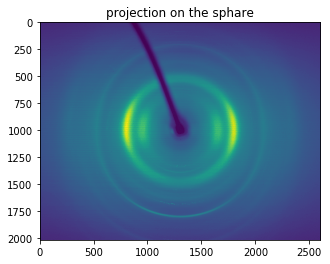

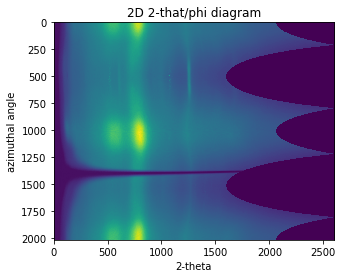

azimutal step is 0.178571  2-theta step is 0.028164
The maximum angle of 2-theta is  73.23


In [1]:
### XRAY_28_DES_2020
### vertical axis is converted to 2-theta axis by bilinear interpolation.
### then coverted to polar coordinate and save data as pandas table.

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import cv2
from tqdm import tqdm
import pandas as pd
from common.xray import *
%matplotlib inline

# center coordinate visually determined
cx=int(1451) # 151-1451-2751
cy=int(2560/2) # 30- 1230 -2430

in_path='./data'
polar_path='./results/polar'
sphere_path='./results/sphere'

xrd_names=sorted([filename for filename in os.listdir(in_path) if not filename.startswith('.')])

for fl_name in xrd_names:
    fd = open(os.path.join(in_path,fl_name), 'rb')
    fn=fl_name.split('.')[0]

    rawdata=fd.read()
    fd.close()

    # initial area of IP 
    rows=2800
    cols=2560

    f = Image.frombytes('F', (2800,2560), rawdata, "raw",'F;16B')
    im =np.array(f)

    # trimmed area of 1300X1200 size centered at virtual center
    im_t= im[(cy-1200):(cy+1200), (cx-1300):(cx+1300)]
    plt.imshow(np.sqrt(im_t))
    plt.title('original diagram center-adjusted manually')
    print('cropped image size is ',im_t.shape[0],' x ',im_t.shape[1], 'pixcel')
    plt.show()

    warp_img = spherical_projection(im_t, 1480)  
    wp =warp_img.astype('uint16')
    plt.imshow(np.sqrt(wp))
    plt.title('projection on the sphare')
    cv2.imwrite(os.path.join(sphere_path,fn+'.tif'),wp)
    plt.show()

    polar_image = polar_projection(wp)
    plt.imshow(np.sqrt(polar_image))
    plt.title('2D 2-that/phi diagram')
    plt.xlabel('2-theta')
    plt.ylabel('azimuthal angle')
    plt.show()
    
    # saving 2-theta / Phi data in array.
    # assuming d004=2.6, 2theta=34.6
    # 004 position in 2-theta was 1228.5 (measured from one of diagrams)
    # then  0.02816 degree/pixcel
    #
    num_y,num_x= polar_image.shape
    y_res=360/polar_image.shape[0]
    x_res=34.6/1228.5
    x_label='{:.6f}'.format(x_res) 
    y_label='{:.6f}'.format(y_res) 
    print('azimutal step is '+y_label,' 2-theta step is '+x_label)
    print('The maximum angle of 2-theta is ', '{:.2f}'.format(num_x*x_res))

    index=np.arange(0, 360, y_res)
    column_name=np.arange(0, num_x*x_res, x_res)
    df=pd.DataFrame(polar_image,index=index, columns=column_name)
    df  # 
    df.to_pickle(os.path.join(polar_path,fn+'.pkl'))

End of programs. Results are in the directory ./results